In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import re

In [71]:
# Step 1: Load the oil dataset 

# Read CSV using semicolon delimiter
df = pd.read_csv('saudi-oil-database.csv', delimiter=';')

# Now print columns
print(df.columns.tolist())



['Time Period', 'Energy Product Name', 'Flow breakdown', 'Unit of Measure', 'Value', 'Assessment Code']


In [72]:


# Function to check if the value is a valid number
def is_valid_number(x):
    return bool(re.fullmatch(r'-?\d+(\.\d+)?', str(x)))



# Remove rows where Value is not a valid float
df_clean = df[df['Value'].apply(is_valid_number)].copy()



# Convert Value column to float
df_clean['Value'] = df_clean['Value'].astype(float)



print("Rows after cleaning:", len(df_clean))



Rows after cleaning: 130134


In [73]:
# Pivot the data: rows = Time Period, columns = Flow breakdown, values = Value
# Pivot the data using the CLEANED dataframe
df_pivot = df_clean.pivot_table(
    index='Time Period',
    columns='Flow breakdown',
    values='Value',
    aggfunc='sum'
)



# Drop any rows with missing data
df_pivot = df_pivot.dropna()

print("Columns after pivot:", df_pivot.columns.tolist())

# Now df_pivot has columns like 'Crude production', 'Exports', etc.
# You can use this DataFrame for PCA

# Example: print the pivoted DataFrame
print(df_pivot.head())

Columns after pivot: ['Closing stocks', 'Demand', 'Direct use', 'Exports', 'From other sources', 'IProducts transferred', 'Imports', 'Production', 'Products transferred', 'Products transferred/Backflows', 'Receipts', 'Refinery intake', 'Refinery output', 'Statistical difference', 'Stock changes']
Flow breakdown  Closing stocks       Demand  Direct use      Exports  \
Time Period                                                            
2009-01            719914.0210  185232.3755  29536.8694  613409.1661   
2009-02            715745.3112  184619.3987  29961.3352  541301.9953   
2009-03            738654.6924  192525.8260  30423.1560  577220.1464   
2009-04            738984.3675  210900.4407  45020.2100  548765.9095   
2009-05            729665.7782  238420.2722  60852.3344  564710.5576   

Flow breakdown  From other sources  IProducts transferred      Imports  \
Time Period                                                              
2009-01                    19123.0               

In [65]:
#  Standardize the features (mean=0, std=1)
# PCA is sensitive to scale, so this step is crucial
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pivot)

#  Create PCA object and reduce dimensions to 2 for visualization
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


In [74]:
# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3'], index=df_pivot.index)

# Optional: print to check the structure
print(df_pca.head())


                  PC1       PC2       PC3
Time Period                              
2009-01     -4.789788 -2.382760  0.344331
2009-02     -5.857346 -1.978022  0.120657
2009-03     -5.402650 -1.608275  1.191983
2009-04     -4.739037 -0.230834 -0.056523
2009-05     -3.678746  1.383084 -0.680982


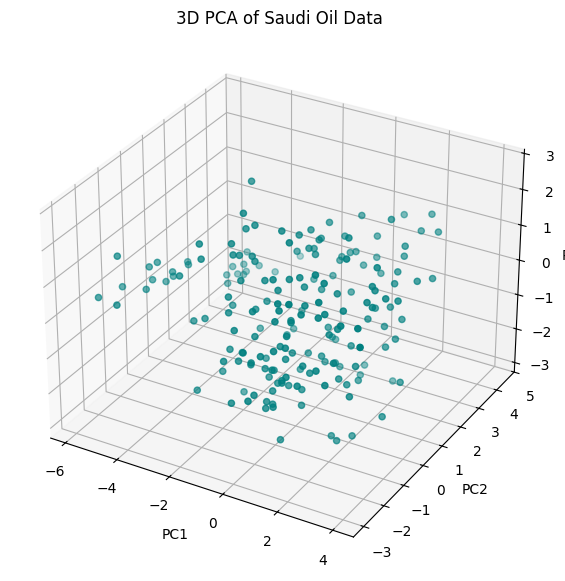

In [75]:



# plt.figure(figsize=(10, 6))
# plt.scatter(df_pca['PC1'], df_pca['PC2'], color='royalblue')

# for i, label in enumerate(df_pca.index):
#     plt.annotate(label, (df_pca['PC1'][i], df_pca['PC2'][i]), fontsize=8, alpha=0.6)

# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of Saudi Oil Data')
# plt.grid(True)
# plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], color='teal')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA of Saudi Oil Data')
plt.show()



In [76]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by PC1, PC2 and PC3:", explained_variance)


Explained variance by PC1, PC2 and PC3: [0.39812863 0.22107435 0.12864713]


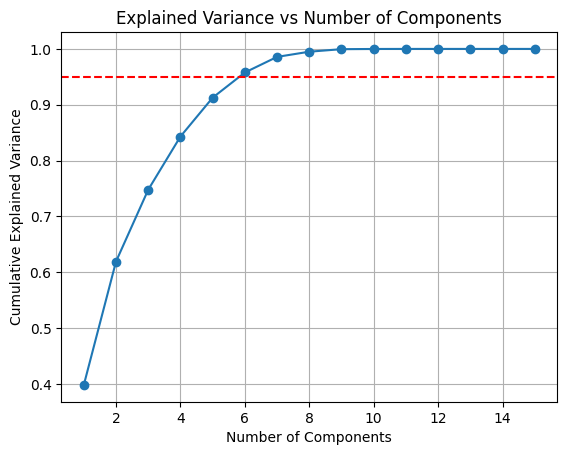

In [77]:
pca_full = PCA()
pca_full.fit(X_scaled)

cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()
